## Graphs using MySQL

### Task 1 - Text
Create a visualization that provides a breakdown between the male and female employees working in the company each year, starting from 1990. 

## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

We have already assembled the data from the database utilizing MySQL, and created and extracted a csv file.

### Here was the SQL code:

SELECT 

    YEAR(d.from_date) AS calendar_year,
    e.gender,    
    COUNT(e.emp_no) AS num_of_employees

FROM     
     t_employees e         
          JOIN    
     t_dept_emp d ON d.emp_no = e.emp_no

GROUP BY calendar_year , e.gender 

HAVING calendar_year >= 1990;

In [1]:
# Import the tools we need

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline

## EDA

Let's look at our csv data file

In [2]:
df = pd.read_csv("task_1.csv")
df.shape

(26, 3)

In [3]:
df.head()

,calendar_year,gender,num_of_employees
0,1998,M,8929
1,1990,F,5470
2,1992,M,8480
3,1993,F,5623
4,1999,M,9199


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   calendar_year     26 non-null     int64 
 1   gender            26 non-null     object
 2   num_of_employees  26 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 752.0+ bytes


### Sort DataFrame by calendar_year

In [5]:
df.sort_values(by=["calendar_year"], inplace=True, ascending=True)
df.calendar_year.head()

1     1990
10    1990
8     1991
14    1991
2     1992
Name: calendar_year, dtype: int64

## Make a copy of the original dataframe

In [6]:
df_tmp = df.copy()

In [7]:
df_tmp.head(10)

,calendar_year,gender,num_of_employees
1,1990,F,5470
10,1990,M,8134
8,1991,M,8295
14,1991,F,5255
2,1992,M,8480
13,1992,F,5596
3,1993,F,5623
18,1993,M,8483
12,1994,F,5719
9,1994,M,8468


In [8]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 1 to 25
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   calendar_year     26 non-null     int64 
 1   gender            26 non-null     object
 2   num_of_employees  26 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 832.0+ bytes


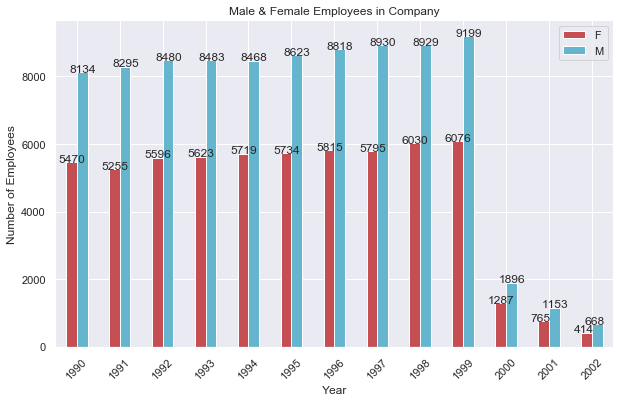

In [9]:
sns.set()
df2 = df_tmp.pivot_table(
    index=['calendar_year'],
    columns=['gender'])

ax = df2.plot.bar(figsize=(10,6), color = 'rc')
ax.legend(labels=df2.columns.levels[1])
ax.set_xlabel('Year')
ax.set_ylabel('Number of Employees')
ax.set_title('Male & Female Employees in Company')

x_offset = -.3
y_offset = -.3

for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

plt.xticks(rotation = 45)
plt.show();
